In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Resampling Methods</center></h1>

<b>Resampling methods</b> involve repeatedly drawing samples from training data and refitting a model on them. Resampling approaches can be computationally expensive. <b>Cross-validation</b> and <b>bootstrap</b> are two of the most commonly used resampling methods. Cross-validation can be used to estimate the test error rate associated with a given model in order to evaluate its performance. The process of evaluating a model's performance is called <b>model assessment</b>. The process of selecting proper level of flexibility for a model is known as <b>model selection</b>.

### 5.1 Cross-Validation 

<b>Test error rate</b> can be easily calculated if a designated test set is available. This is usually not the case. One approach is to estimate the test error rate by <b>holding out</b> a subset of the training observation from the fitting process and then apply the model to the held out observations. 

#### 5.1.1 The Validation Set Approach 

The validation set approach involves dividing the available set of observations into two part: a <b>training set</b> and a <b>validation set</b>. The model is fit on the training set and the fitted model is used to compute the validation set error rate. Validation set approach is simple and easy to implement but it has two drawbacks:

 - Validation set error rate can be highly variable, depending on which observations are included in the training set and which in the validation set.
 
 
 - As only a subset of the observations is used to fit the model, the modle tends to perform worse. This suggests that the validation set error rate may tend to <b>overestimate</b> the test error rate for the model fitted on the entire data set.

#### 5.1.2 Leave-One-Out Cross-Validation 

<b>Leave-one-out cross-validation (LOOCV)</b> is closely related to the validation set approach. LOOCV also involves splitting the data set into two parts. Instead of creating two subsets of comaparable size, a <b>single observation</b> is used for the validation set and the remaining observations are used for the trainig set. The <b>MSE</b> of a single observation of the validation set can provide an unbiased estimate for the test error but it is <b>highly variable</b>.

The LOOCV process can be repeated $n$ times, producing $n$ different MSEs, when each time validation set consists of $i$th observation, where value of $i$ ranges from $1$ to $n$. The MSE for validation sets is given as:

$$MSE_{i} = (y_i - \widehat{y_i})^2$$

and the overall estimate of <b>test MSE</b> is the average of these $n$ validation errors:

$$CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} MSE_{i}$$

LOOCV has far <b>less bias</b> when compared to validation set approach. It does not tend to overestimate the test error rate as much as the validation set approach does. Performing LOOCV multiple times will always yield the same results as there is no randomness in the training/validation set split. LOOCV can be expensive to implement as the model has to be fitted n-times. LOOCV is a very generic approach and can be used with any kind of predictive modeling.

#### 5.1.3 k-Fold Cross-Validation 

<b>k-fold CV</b> is an alternative to LOOCV. In this aproach the observations are randomly divided into $k$ groups of approximately equal size. The first fold is treated as a validation set and the method is fit on the remaining $k-1$ folds. The $MSE_{1}$ is computed on the observations in the held-out fold. The process is repeated $k$ times. Each time a different group of observation is treated as the validation set. The $k$-fold CV estimate is given as:

$$CV_{(k)} = \frac{1}{k} \sum_{i=1}^{k} MSE_{i}$$

LOOCV is a special case of $k$-fold CV with $k=n$. Generally, a typical value of $K=5$ or $k=10$ is chosen. $k$-fold CV has an advantage of less computational complexity as model needs to be fitted $k$ times only. There may arise some variability in the CV estimates as there is some variability in the divison of the observations into the folds.

Sometimes instead of arriving on a correct estimate of test MSE, we are more interested in selecting the model for which the test MSE will be minimum. Hence, for this purpose, the location of the minimum point in the estimated test MSE curve is more important, which can help in deciding the correct flecibility of the model. $k$-fold CV does a pretty decent job in this.

#### 5.1.4 Bias-Variance Trade-Off for k-Fold Cross-Validation

Apart from computational advantage, $k$-fold CV gives more accurate estimates of the test error rate than LOOCV. Since LOOCV uses $n-1$ observations as training set, it will give approximately unbiased (low bias) estimates of the test error. Compared to validation set approach, $k$-fold CV has low bias as well. But from the prespective of <b>bias reduction</b>, LOOCV is to be preferred over $k$-fold CV.

LOOCV has <b>higher variance</b> compared to $k$-fold CV for $k < n$. As we know that, <b>mean of highly correlated quantities has higher variance compared to the mean of quantities that are not highly correlated.</b> For the LOOCV, as the different models share higher amount of data compared to $k$-fold CV, they are somewhat more correlated. Hence, the test error estimate of LOOCV has <b>higher variance</b> compared to $k$-fold CV. $k$-fold CV with $k=5$ or $k=10$, yields test error estimates that suffer neither from excessively high bias, nor from very high variance.

<b>Mean of highly correlated quantities have higher variance</b> as:

 - When the elements of each sample are positively correlated, when one value is high the others tend to be high, too. Their mean will then be high. When one value is low the others tend to be low, too. Their mean will then be low. Thus, the means tend either to be high or low.
 
 
 - When elements of each sample are not correlated, the amount by which some elements are high is often balanced (or "canceled out") by other low elements. Overall the mean tends to be very close to the average of the population from which the samples are drawn--and rarely much greater or much less than that.

#### 5.1.5 Cross-Validation on Classification Problems

In the case of classification, cross-validation works in the same way. However, instead of using MSE to quantify the test error, we can use the number of misclassified observations. For example, in classification setting, the LOOCV error rate takes the form:

$$CV_{n} = \frac{1}{n} \sum_{i=1}^{n} Err_i$$

where $Err_i = I(y_i \neq \widehat{y_i})$. $k$-fold CV error rate and validation set error rate are defined similarly.

In general <b>10-fold CV</b> error rate provides a good approximation to the test error rate (though it somewhat underestimates it). It reaches a minimum value for the correct flexibiliy of model.

### 5.2 The Bootstrap

<b>Bootstrap</b> can be used to to quantify the uncertainty associated with a given statistical model. For example, bootstrap can be used to estimate <b>standard errors (which measures the uncertainty)</b> of the coefficients from a linear regression fit. Bootstrap can be applied to a wide range of statistical learning methods. The method of bootstrap is explained below via an example:

Suppose we wish to invest money in two financial assests which yield returns of $X$ and $Y$. We will invest fraction $\alpha$ of our money in $X$ and $1-\alpha$ in $Y$. As there is a variablility associated with these returns, we wish to choose $\alpha$ which minimizes the total risk or variance of our investment. i.e. <b>We want to minimize $Var(\alpha X + (1-\alpha) Y)$</b>. The value that minimizes this is given as:

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

where $\sigma_X^2 = Var(X)$, $\sigma_Y^2 = Var(Y)$ and $\sigma_{XY} = Cov(X, Y)$. As these quantities are unknown, we can make estimates for them using the past measurements of $X$ and $Y$ and hence the estimate of $\alpha$ can be computed.

One way to quantify the accuracy of the estimate of $\alpha$ is to repetedly draw 100 pairs of observations $(X, Y)$ 1000 times and hence estimating $\alpha$ 1000 times. Suppose for the simulations, the parameters were set to $\sigma_X^2 = 1$, $\sigma_Y^2 = 1.25$ and $\sigma_{XY} = 0.5$, then the true value of $\alpha$ is 0.6. If the estimated vlaue of $\alpha$ (from the simulation) turns out to be <b>0.5996</b> with standard deviation of <b>0.083</b>, we may say that the estimated value of $\alpha$ (which is $\widehat{\alpha}$) differs from the true value by 0.08 on an average.

In practice, for real data, we can not generate new samples from the original population and hence the above explained procedure is not feasible. <b>In bootstrap method, instead of obtaining independent data sets from the population, we obtain distinct data set by repeatedly sampling observations from the original data set.</b> For a sample with $n$ observations, each bootstrap data set contains $n$ observations <b>(sampled with replacement)</b> from the original dataset. A total of $B$ bootstrap data sets labeled as $Z^{*1}$, $Z^{*2}$, ..., $Z^{*B}$ are generated and corresponding B estimates of $\alpha$ ($\widehat{\alpha}^{*1}$, $\widehat{\alpha}^{*2}$, ..., $\widehat{\alpha}^{*B}$) are obtained. The standard error of these bootstrap estimates can be obtained by:

$$SE_{B}(\widehat{\alpha}) = \sqrt{\frac{1}{B-1} \sum_{r=1}^{B} \bigg( \widehat{\alpha}^{*r} - \frac{1}{B} \sum_{r^{'}=1}^{B} \widehat{\alpha}^{*r^{'}} \bigg ) ^2}$$

This way, a bootstrap process can be used very effictevly to estimate the variability associated with an estimated parameter.

### 5.4 Exercises
#### Conceptual

Q1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive that the value of $\alpha$ which minimizes $Var(\alpha X + (1 - \alpha) Y)$ is:

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

<b>Sol:</b> As we know that $Var(aX + bY) = a^2 Var(X) + b^2 Var(Y) + 2abCov(X, Y)$, the above quantity (that needs to be minimized) can be transformed as:

$$Var(\alpha X + (1 - \alpha) Y) = \alpha^2 Var(X) + (1-\alpha)^2 Var(Y) + 2 \alpha(1-\alpha) Cov(X, Y)$$

Differentiating with respect to $\alpha$ and equation it to 0, we get:

$$2\alpha Var(X) - 2(1-\alpha)Var(Y) + 2(1-2\alpha)Cov(X, Y) = 0$$

$$\alpha \bigg[Var(X) + Var(Y) -2Cov(X, Y) \bigg] = Var(Y) - Cov(X, Y)$$

$$\alpha = \frac{Var(Y) - Cov(X, Y)}{Var(X) + Var(Y) -2Cov(X, Y)} = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

Q2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

<b>Sol:</b> As the probability of $j$th observation being selected as the fisrt bootstrap sample is $\frac{1}{n}$, the probability that the first bootstrap observation is not the $j$th observation is $1 - \frac{1}{n}$.

(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

<b>Sol:</b> Same as above, as we are doing sampling with replacement.

(c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − \frac{1}{n})^n$.

<b>Sol:</b> As we are selecting $n$ observations and the probablity that the $j$th observation is not selected as one of the individual samples is $1 - \frac{1}{n}$, the overall probability of $j$th sample not being selected is $(1 − \frac{1}{n})^n$.

(d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

<b>Sol:</b> Probability is $1 - (1 - \frac{1}{5})^5 = 1 - 0.32768 = $ <b>0.67232</b>. 

(e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

<b>Sol:</b> Probability is $1 - (1 - \frac{1}{100})^100 = 1 - 0.366 = $ <b>0.634</b>. 

(f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

<b>Sol:</b> Probability is $1 - (1 - \frac{1}{10000})^10000 = 1 - 0.36786 = $ <b>0.63214</b>. 

(g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

<b>Sol:</b> The plot is displayed below. It can be observed that for a value of n=30, the value of probability reaches around <b>0.632</b>.

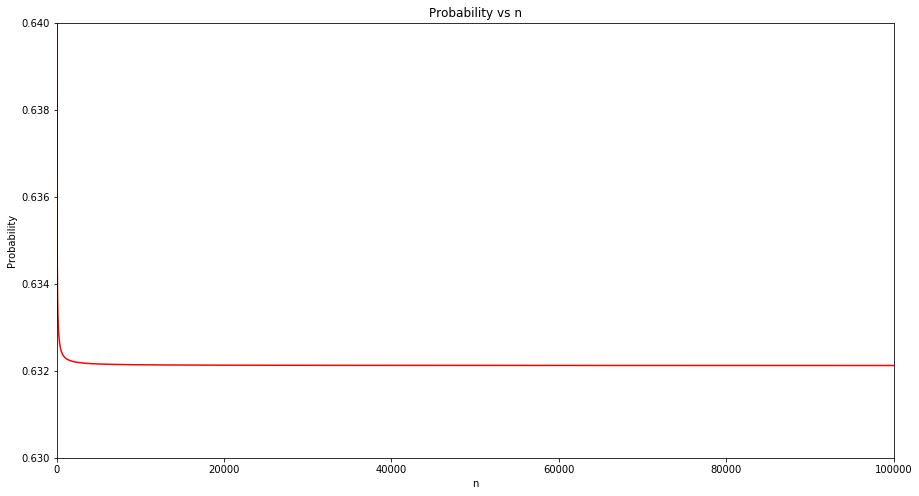

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compute_probability(n):
    return 1 - (1 - 1/n)**n

n_array = np.arange(1,100001)
prob = {}
for n in n_array:
    prob[n] = compute_probability(n)
    
lists = sorted(prob.items()) 
x, y = zip(*lists)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(x, y, color='r')
ax.set_xlabel('n')
ax.set_ylabel('Probability')
ax.set_title('Probability vs n')
ax.set_xlim(10, 100000)
ax.set_ylim(0.63, 0.64)

plt.show()